# Breadth-First Search

- Algorithm for traversing or searching tree or graph data structures.
- Starts at the tree root and explores all neighbor nodes
- Explores all nodes at the present depth before moving on to the next depth level.
- **Breath** means it explores all nodes at the present depth before moving on to the next depth level.

# Approach
One approach is to use BFS to find the shortest path from the start to the end.
1. Model the problem as a [graph](<../DataStructures.ipynb>).
2. Use BFS to find the shortest path from the start to the end.


### Complexity
- Time complexity is $O(V+E)$ where V is the number of vertices and E is the number of edges in the graph.
- Space complexity is $O(V)$ where V is the number of vertices in the graph.


### Questions it answers
1. Is there a path from node A to node B?
2. What is the shortest path from node A to node B?

### Is there a path from node A to node B?
- If the BFS algorithm reaches node B, then there is a path from node A to node B.
- Otherwise, there is no path from node A to node B.

Sample problem: 
You need to find a Mango seller in your Facebook network. 

- You start with your friends and check if they are Mango sellers.
- If they are not Mango sellers, you check their friends.

In [24]:
# Create network of friends from a list of friends. Make one of them the mango seller. THe Person object is {Name, Friends, isMangoSeller}. Limit to only 2 levels of friends.

from collections import deque

class Person:
    def __init__(self, name, friends, isMangoSeller, isPokemonTrainer=False):
        self.name = name
        self.friends = friends
        self.isMangoSeller = isMangoSeller
        self.isPokemonTrainer = isPokemonTrainer

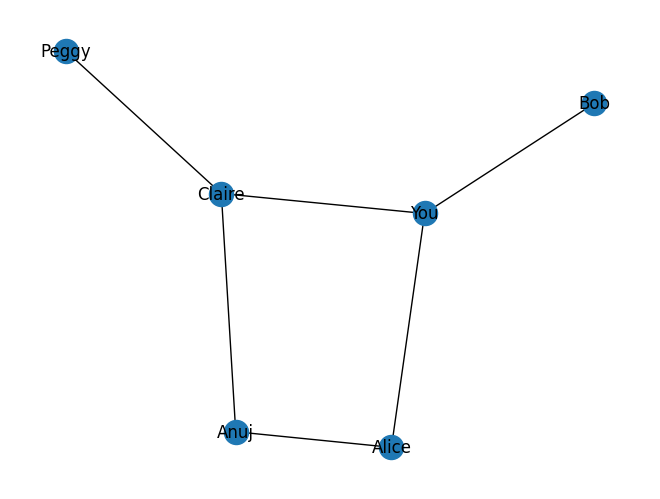

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
you = Person("You", ["Alice", "Bob", "Claire"], False)
bob = Person("Bob", [], False)
alice = Person("Alice", ["Anuj"], False)
claire = Person("Claire", ["Anuj", "Peggy"], False)
anuj = Person("Anuj", [], False)
peggy = Person("Peggy", [], True)

graph = {
    "You": you,
    "Bob": bob,
    "Alice": alice,
    "Claire": claire,
    "Anuj": anuj,
    "Peggy": peggy
}

G = nx.Graph()


for person in graph:
    G.add_node(person)
    for friend in graph[person].friends:
        G.add_edge(person, friend)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


In [26]:


def search(name, graph):
    """Search for the mango seller among the friends of the person"""
    search_queue = deque()

    # Get the friends of the person
    search_queue += graph[name].friends
    # Keep track of the people already searched
    searched = []

    while search_queue:
        print(f"Searching for mango seller among {name}'s network: {search_queue}")

        person = search_queue.popleft()
        # Check if the person is the mango seller
        if person not in searched:
            if graph[person].isMangoSeller:
                print(f"{person} is a mango seller!")
                return True
            else:
                # Add the friends of the person to the search queue
                search_queue += graph[person].friends
                print(f"Adding {person}'s friends to the search queue: {graph[person].friends}")
                searched.append(person)
                
    

search("You", graph)



Searching for mango seller among You's network: deque(['Alice', 'Bob', 'Claire'])
Adding Alice's friends to the search queue: ['Anuj']
Searching for mango seller among You's network: deque(['Bob', 'Claire', 'Anuj'])
Adding Bob's friends to the search queue: []
Searching for mango seller among You's network: deque(['Claire', 'Anuj'])
Adding Claire's friends to the search queue: ['Anuj', 'Peggy']
Searching for mango seller among You's network: deque(['Anuj', 'Anuj', 'Peggy'])
Adding Anuj's friends to the search queue: []
Searching for mango seller among You's network: deque(['Anuj', 'Peggy'])
Searching for mango seller among You's network: deque(['Peggy'])
Peggy is a mango seller!


True

With this algorithm, you'll go over all your friends and their friends until you find a Mango seller.

### Shortest Path
- The shortest path is the path with the fewest edges.
- The shortest path is not necessarily the path with the shortest distance.

In BFS, we prefer to visit nodes in the order of their distance from the start node. This way, we can find the shortest path from the start node to any other node.

### Queue
We use a queue to keep track of the nodes to visit next. 
- We start by adding the start node to the queue.
- We then remove the first node from the queue and visit its neighbors.
- We add the neighbors to the queue.
- We repeat this process until we find the end node or the queue is empty.

See more about [Queue](<../DataStructures.ipynb>) here.


### Implementation
1. Keep a Queue to keep track of the nodes to visit next.
2. Pop off a node from the queue.
3. Check if the node is the end node.
4. If it is, return the path.
5. If it is not, add its neighbors to the queue.
6. Repeat steps 2-5 until the queue is empty.
7. To avoid visiting the same node twice, keep track of the visited nodes.

In [27]:
## Sample BFS using queue. This time let's check if a person is a pokemon trainer

# Create the graph
Ash = Person("Ash", ["Misty", "Brock"], False, False)
Misty = Person("Misty", [], False, True)
Brock = Person("Brock", ["Misty"], False, False)
You = Person("You", ["Ash", "Misty", "Brock"], False, False)

graph = {
    "Ash": Ash,
    "Misty": Misty,
    "Brock": Brock,
    "You": You
}

def isPokemonTrainer(name, graph):
    """Check if a person is a pokemon trainer"""
    search_queue = deque()

    # Keep a Queue containing people to search
    search_queue += graph[name].friends

    # Keep track of the people already searched
    searched = []

    while search_queue:
        print(f"Searching for pokemon trainer among {name}'s network: {search_queue}")

        # Pop off a person from the queue
        person = search_queue.popleft()

        # Check if the person is a pokemon trainer
        if person not in searched:
            if graph[person].isPokemonTrainer:
                print(f"{person} is a pokemon trainer!")
                return True
            else:
                # Add the friends of the person to the search queue
                search_queue += graph[person].friends
                print(f"Adding {person}'s friends to the search queue: {graph[person].friends}")
                searched.append(person)

isPokemonTrainer("You", graph)


Searching for pokemon trainer among You's network: deque(['Ash', 'Misty', 'Brock'])
Adding Ash's friends to the search queue: ['Misty', 'Brock']
Searching for pokemon trainer among You's network: deque(['Misty', 'Brock', 'Misty', 'Brock'])
Misty is a pokemon trainer!


True

## Topological Sort
- Topological sort is a way to order the vertices in a directed graph such that for every directed edge $uv$ from vertex $u$ to vertex $v$, $u$ comes before $v in the ordering.
- Topological sort is only possible in a Directed Acyclic Graph (DAG).
- When a node depends on another node, the dependent node comes after the node it depends on.

### Applications
- Scheduling tasks
- Data processing
- Pre-requisite problems


## Tree
- In a tree, there is only one path between any two nodes.
- There is no cycle.
- No edges ever point back to a node.

# Section Key Takeaways
- BFS is an algorithm for traversing or searching tree or graph data structures.
- BFS starts at the tree root and explores all neighbor nodes.
- It explores all nodes at the present depth before moving on to the next depth level.
- It can be used to find the shortest path from the start to the end.
- The shortest path is the path with the fewest edges.
- The shortest path is not necessarily the path with the shortest distance.
- BFS uses a queue to keep track of the nodes to visit next.
- Topological sort dumbed down is a way to order the vertices in a directed graph such that for every directed edge $uv$ from vertex $u$ to vertex $v$, $u$ comes before $v in the ordering.
- Topological sort is only possible in a Directed Acyclic Graph (DAG).
- In a tree, there is only one path between any two nodes.
- There is no cycle in a tree.
- To avoid visiting the same node twice, keep track of the visited nodes.
